In [ ]:
import numpy as np

x_train = np.random.random((1000,12))
y_train = np.random.randint(2, size=(1000,1))
x_test = np.random.random((100,12))
y_test = np.random.randint(2, size=(100,1))


%matplotlib inline
import matplotlib.pyplot as plt

plot_x = x_train[:,0]
plot_y = x_train[:,1]
plot_color = y_train.reshape(1000,)

plt.scatter(plot_x, plot_y, c=plot_color)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

plot_x = x_train[:,0]
plot_y = x_train[:,1]
plot_z = x_train[:,2]
plot_color = y_train.reshape(1000,)

ax.scatter(plot_x, plot_y, plot_z,c=plot_color)
plt.show()

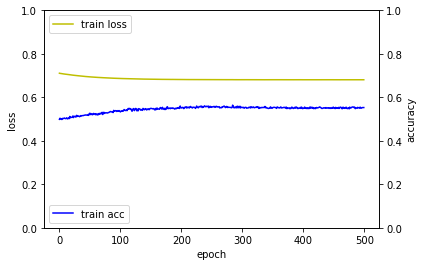

100/100 [==============================] - 0s 1ms/step
loss_and_metrics : [0.7056726741790772, 0.53000000000000003]


In [11]:
#퍼셉트론 신경망 모델
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random
import sys

RESULT_NAME = "Part4 퍼셉트론 신경망"

x_train = np.random.random((1000,12))
y_train = np.random.randint(2, size=(1000,1))
x_test = np.random.random((100,12))
y_test = np.random.randint(2, size=(100,1))

model = Sequential()
model.add(Dense(1, input_dim=12,activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

oldStdOut = sys.stdout
filePath = "./log/"
filePath += RESULT_NAME+".txt"
sys.stdout = open(filePath,'w')
hist = model.fit(x_train, y_train, epochs=500, batch_size=64)
sys.stdout = oldStdOut

%matplotlib inline
import matplotlib.pyplot as plt


fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

filePath = "./결과/"
filePath += RESULT_NAME+".png"
plt.savefig(filePath, bbox_inches='tight', dpi=100)
plt.show()



loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))

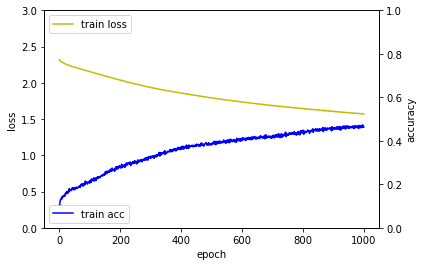

100/100 [==============================] - 0s 1ms/step
loss and metrics : [3.2348095417022704, 0.089999999999999997]


In [12]:
#다층퍼셉트론 신경망 모델

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import random

RESULT_NAME = "Part4 다층 퍼셉트론 신경망"

x_train = np.random.random((1000,12))
y_train = np.random.randint(10, size=(1000,1))
y_train = to_categorical(y_train, num_classes=10)

x_test = np.random.random((100,12))
y_test = np.random.randint(10, size=(100,1))
y_test = to_categorical(y_test, num_classes=10)

model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#Save log to file.
import sys
oldStdout = sys.stdout
filePath = "./log/"
filePath += RESULT_NAME+".txt"
file = open(filePath,'w')
sys.stdout = file
hist = model.fit(x_train, y_train, epochs=1000, batch_size=64)
sys.stdout = oldStdout

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0,3.0])
acc_ax.set_ylim([0.0,1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

filePath = "./결과/"
filePath += RESULT_NAME+".png"
plt.savefig(filePath, dpi=100)
plt.show()

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss and metrics : ' + str(loss_and_metrics))

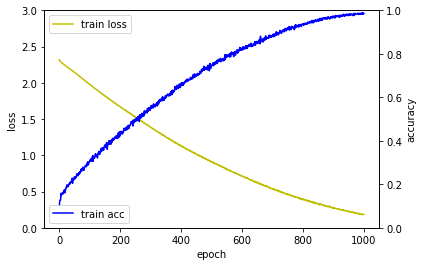

100/100 [==============================] - 0s 1ms/step
loss and metrics : [7.6235892295837404, 0.11]


In [13]:
#깊은 다층퍼셉트론 신경망 모델
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import random

RESULT_NAME = "Part4 깊은 다층 퍼셉트론 신경망"

x_train = np.random.random((1000,12))
y_train = np.random.randint(10, size=(1000,1))
y_train = to_categorical(y_train, num_classes=10)
x_test = np.random.random((100,12))
y_test = np.random.randint(10, size=(100,1))
y_test = to_categorical(y_test, num_classes=10)

model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

import sys
oldStdout = sys.stdout
filePath = "./log/"
filePath += RESULT_NAME+".log"
sys.stdout = open(filePath,'w')
hist = model.fit(x_train, y_train, epochs=1000, batch_size=64)
sys.stdout = oldStdout

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0,3.0])
acc_ax.set_ylim([0.0,1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

filePath = "./결과/"
filePath += RESULT_NAME+".png"
plt.savefig(filePath,dpi=100)
plt.show()

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss and metrics : ' + str(loss_and_metrics))